# Preparation

In [1]:
# Import of basic libraries for converting data from excel to a dataframe and libraries that provide functions to plot the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler, KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Import dataset

In [2]:
# Import DataSet from GitHub Respository and define which Excelsheets are to be transferred into pandas dataframes
path ="https://github.com/KingKai69/VisualAnalytics/raw/main/Automobile_data.csv"

df = pd.read_csv(path)

df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [ ]:
min_value = df['highway-mpg'].min()
max_value = df['highway-mpg'].max()

# Gib die Ergebnisse aus
print(f"Der kleinste Wert ist {min_value}")
print(f"Der größte Wert ist {max_value}")

Der kleinste Wert ist 16
Der größte Wert ist 54


## Interpolation

In [4]:
# "?"-Symbole durch NaN-Werte ersetzen
df.replace('?', float('nan'), inplace=True)

In [5]:
# Show the columns that contain nan
df.isna().any()

symboling            False
normalized-losses     True
make                 False
fuel-type            False
aspiration           False
num-of-doors          True
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                  True
stroke                True
compression-ratio    False
horsepower            True
peak-rpm              True
city-mpg             False
highway-mpg          False
price                 True
dtype: bool

In [6]:
# Imputing 
df_imputed = df.fillna(df.mode().iloc[0])
df_imputed.isna().any()

symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

## Label Encoding

In [7]:
# Erstellen Sie einen LabelEncoder-Objekt
le = LabelEncoder()

# Wenden Sie den LabelEncoder auf mehrere Spalten in Ihrem DataFrame an
columns_to_encode = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location','engine-type','num-of-cylinders','fuel-system']  # Liste mit den Spaltennamen
for column in columns_to_encode:
    df_imputed[column] = le.fit_transform(df_imputed[column])

df_imputed.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,161,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495
1,3,161,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500
2,1,161,0,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,1,1,0,0,3,1,0,99.8,...,109,5,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,1,1,0,0,3,0,0,99.4,...,136,5,3.19,3.4,8.0,115,5500,18,22,17450


## Scaling

In [8]:
# StandardScaler
scaler = StandardScaler()

# StandardScaler auf ausgewählte Spalten des Datensatzes anwenden
#columns_to_scale = ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'normalized-losses']
#StandardScaler auf die ausgewählten Spalten anwenden
#df_scaled = scaler.fit_transform(df_imputed[columns_to_scale])

scaled_data = scaler.fit_transform(df_imputed)
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)

# Gib den aktualisierten DataFrame aus
df_scaled.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1.743470,0.885253,-1.948256,0.328798,-0.469295,1.141653,-3.050975,1.213330,-0.121867,-1.690772,...,0.074449,0.869568,0.492718,-1.844656,-0.288349,0.179306,-0.270357,-0.646553,-0.546059,0.035948
1,1.743470,0.885253,-1.948256,0.328798,-0.469295,1.141653,-3.050975,1.213330,-0.121867,-1.690772,...,0.074449,0.869568,0.492718,-1.844656,-0.288349,0.179306,-0.270357,-0.646553,-0.546059,0.418767
2,0.133509,0.885253,-1.948256,0.328798,-0.469295,1.141653,-0.717207,1.213330,-0.121867,-0.708596,...,0.604046,0.869568,-2.399480,0.675523,-0.288349,1.265619,-0.270357,-0.953012,-0.691627,0.418767
3,0.938490,0.970374,-1.788499,0.328798,-0.469295,-0.875923,0.449677,-0.589081,-0.121867,0.173698,...,-0.431076,0.869568,-0.532364,0.452216,-0.035973,-0.048061,0.777340,-0.186865,-0.109354,0.093912
4,0.938490,0.970374,-1.788499,0.328798,-0.469295,-0.875923,0.449677,-2.391492,-0.121867,0.107110,...,0.218885,0.869568,-0.532364,0.452216,-0.540725,0.280359,0.777340,-1.106241,-1.273900,0.539791


# Modelling

In [9]:
# For our modelling we will use the two models we learned today
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Import a set of standard classification metrics
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, matthews_corrcoef, precision_score, recall_score, make_scorer

# We also import the functions for the cross-validation
from sklearn.model_selection import KFold, train_test_split, cross_val_score, cross_validate

In [10]:
# Fixing the seed is a very important step to ensure reproducability of our results.
# Many models start with parameters randomly generated. By fixing the seed, we set these randomly generated numbers to a fixed value. prep
SEED = 27

In [11]:
#@title Import libraries and functions

# TQDM provides progressbars
from tqdm import tqdm

# We some of the standard classifiers.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# We also import some preprocessing models. These will be used later
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA

# Import a set of standard classification metrics
from sklearn.metrics import accuracy_score, roc_auc_score, balanced_accuracy_score, f1_score, matthews_corrcoef, precision_score, recall_score, make_scorer

# We also import the functions for the cross-validation
from sklearn.model_selection import KFold, train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import TimeSeriesSplit, cross_validate

# Import Libraries for Resampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel

from imblearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [12]:
#@title Create list of models for Spotchecking

def get_models():
    models=[
       ('Multilayer Perceptron',MLPRegressor(random_state = SEED)),
       ('Decision Tree',DecisionTreeRegressor(random_state = SEED)),
       ('Random Forest',RandomForestRegressor(random_state = SEED)),
       ('Linear Regressor',LinearRegression()),
       ('Gradient Boosting',GradientBoostingRegressor(random_state = SEED)),
       ('Support Vector Machine', SVR()),   # SVC does not have a random state
    ]

    return models

In [13]:
# Create Scorings that are used for Spot Checking and Evaluation in the End
scorings = {
    #'balanced_accuracy':make_scorer(balanced_accuracy_score), 
    #'f1_score':make_scorer(f1_score), 
    #'mcc':make_scorer(matthews_corrcoef),
    'mse' :make_scorer(mean_squared_error),
    'mae' :make_scorer(mean_absolute_error),
}

# Create Scorings for final Evaluation
scoring_wo_scorer = {
    'balanced_accuracy':balanced_accuracy_score, 
    'f1_score':f1_score, 
    'mcc':matthews_corrcoef,
}

In [14]:
features_all = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
            'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
            'wheel-base', 'length', 'width', 'height', 'curb-weight',
            'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system',
            'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm',
            'city-mpg', 'price']

In [ ]:
features = [
    'horsepower',
    'curb-weight',
    'engine-size',
    'highway-mpg'
]

In [55]:
#@title Define X and Y Data
x_data = df_imputed[features_all]
y_data = df_imputed['highway-mpg']

x_data_s = df_scaled[features_all]
y_data_s = df_scaled['highway-mpg']

In [16]:
kf_cv = KFold(n_splits = 5, shuffle = True, random_state=SEED)

# Get our set of different models for the spot checking
models = get_models()

# Empty list to print the results as a nice table
all_cv_scores = []

# We will iter through our list of models
# We will perform the full cross validate run using the current model
for name, clf in tqdm(models):
    
    # We want to improve the printing of our results
    # Therefore we add all the values into a dictionary which we will format for later printing using Pandas 
    formatted_result = {}
    formatted_result['Classifier'] = name

    # Use the simple cross_validate wrapper greatly simplifies the spot checking. We will just compare the models using our 
    cv_score  = cross_validate(estimator = clf, X = x_data, y = y_data, cv = kf_cv, scoring = scorings)

    # cv scores contains the arrays with the score for the current scoring function
    # We will calculate the mean and std and add them to the formatted result dictionary
    for score_name, scores in cv_score.items():
        # Add the completely prepared string 
        formatted_result[f'{score_name}_mean'] = np.mean(scores)
        formatted_result[f'{score_name}_std'] = np.std(scores)
        
        #formatted_result[f'{score_name}'] = scores # We could also add the raw data to the dataframe. However this will make is less readable

    # We need to add the final rows of our results to an overall list.
    # This simplifies the creation of the dataframe
    all_cv_scores.append(formatted_result)


  0%|          | 0/6 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn

In [17]:
pd.DataFrame(all_cv_scores)

,Classifier,fit_time_mean,fit_time_std,score_time_mean,score_time_std,test_mse_mean,test_mse_std,test_mae_mean,test_mae_std
0,Multilayer Perceptron,0.213435,0.006186,0.004110,0.000856,410.746247,152.894906,15.123176,1.697990
1,Decision Tree,0.005747,0.000523,0.002948,0.000129,3.658537,1.822263,0.878049,0.162520
2,Random Forest,0.202545,0.014904,0.009575,0.000368,2.249269,1.029735,0.841220,0.195489
3,Linear Regressor,0.011685,0.016320,0.002146,0.000224,2.641270,0.792666,1.146707,0.134525
4,Gradient Boosting,0.098769,0.002945,0.002790,0.000338,2.113081,0.994319,0.828078,0.205645
5,Support Vector Machine,0.005380,0.001596,0.002784,0.000201,23.526539,6.024052,3.477836,0.374514


In [18]:
#kf_cv = KFold(n_splits = 5, shuffle = True, random_state=SEED)

# Get our set of different models for the spot checking
models = get_models()

# Empty list to print the results as a nice table
all_cv_scores_s = []

# We will iter through our list of models
# We will perform the full cross validate run using the current model
for name, clf in tqdm(models):
    
    # We want to improve the printing of our results
    # Therefore we add all the values into a dictionary which we will format for later printing using Pandas 
    formatted_result = {}
    formatted_result['Classifier'] = name

    # Use the simple cross_validate wrapper greatly simplifies the spot checking. We will just compare the models using our 
    cv_score  = cross_validate(estimator = clf, X = x_data_s, y = y_data_s, cv = kf_cv, scoring = scorings)

    # cv scores contains the arrays with the score for the current scoring function
    # We will calculate the mean and std and add them to the formatted result dictionary
    for score_name, scores in cv_score.items():
        # Add the completely prepared string 
        formatted_result[f'{score_name}_mean'] = np.mean(scores)
        formatted_result[f'{score_name}_std'] = np.std(scores)
        
        #formatted_result[f'{score_name}'] = scores # We could also add the raw data to the dataframe. However this will make is less readable

    # We need to add the final rows of our results to an overall list.
    # This simplifies the creation of the dataframe
    all_cv_scores_s.append(formatted_result)

100%|██████████| 6/6 [00:03<00:00,  1.76it/s]


In [ ]:
pd.DataFrame(all_cv_scores_s)

,Classifier,fit_time_mean,fit_time_std,score_time_mean,score_time_std,test_mse_mean,test_mse_std,test_mae_mean,test_mae_std
0,Multilayer Perceptron,0.312913,0.158958,0.004825,0.003080,0.067925,0.024466,0.176512,0.029465
1,Decision Tree,0.005636,0.001931,0.002639,0.000226,0.074010,0.035625,0.115034,0.023293
2,Random Forest,0.206452,0.013993,0.009391,0.000830,0.046700,0.021701,0.122178,0.030514
3,Linear Regressor,0.003467,0.000804,0.001929,0.000116,0.055969,0.016797,0.166924,0.019583
4,Gradient Boosting,0.103942,0.004308,0.002692,0.000542,0.050130,0.022442,0.127277,0.029369
5,Support Vector Machine,0.005021,0.001368,0.002514,0.000465,0.134442,0.098784,0.209584,0.072111


# Hyperparameters

In [ ]:
# Create a pipeline with 3 stages. Every stage gets a name and an object.
pipe = Pipeline([
        ('resampling', RandomOverSampler(random_state = SEED)),
        ('scaling', StandardScaler()),
        ('clf', RandomForestRegressor(random_state = SEED))
    ])

model = RandomForestRegressor()

In [ ]:
# Building the parameter grid.
# this is a regular dictionary, where every key is the name of the pipeline stage + name of the paramter
param_grid = {
    "clf__n_estimators":np.arange(start = 10, stop = 1000, step = 10,dtype=int),
    "clf__min_samples_split":np.arange(start = 2, stop = 10, step = 1,dtype=int),
    "clf__max_depth":[2, 3, 4, 5],
    "clf__criterion":['friedman_mse', 'squared_error', 'mse']
}

from scipy.stats import randint
param_dist = {
    'n_estimators': randint(50, 500),
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [ ]:
# We can also use any of the CrossValidation algorithms provided by sklearn
# We will use kfold but for time series data we could also use TimeSeriesSplit
kf_cv = KFold(n_splits=5)

hyperparam_optimizer = RandomizedSearchCV(estimator = model, # The estimator or pipeline we want to optimize
                                          param_distributions = param_dist, # Our parameter grid
                                          n_iter = 10, # Searches for 10 random combinations
                                          n_jobs = -1, # Use all available CPU cores
                                          #scoring = "mean_absolute_error", # Name of the scorer used for 
                                          cv = kf_cv # The CrossValidation to use
                                          )

In [ ]:
# Model mit Randomized SearchCV trainieren
hyperparam_optimizer.fit(x_data, y_data)

# Besten Parameterkombinationen und bestes Ergebnis ausgeben
print("Beste Parameter: ", hyperparam_optimizer.best_params_)
print("Bestes Ergebnis: ", hyperparam_optimizer.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Beste Parameter:  {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 133}
Bestes Ergebnis:  0.9070332706347901


# Final Modelling & Evaluation

In [20]:
final_model = RandomForestRegressor()

Durchschnittlicher MAE:  0.8242926829268296


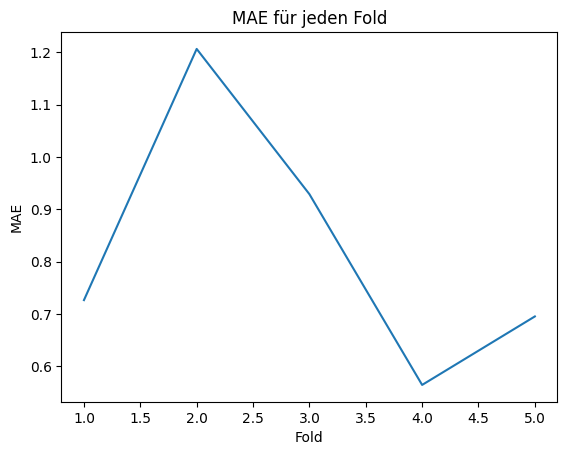

In [21]:
# Führe die Kreuzvalidierung durch und berechne die Metriken
metric = ['neg_mean_absolute_error']
scores = cross_validate(final_model, x_data, y_data, cv=kf_cv, scoring=metric)

# Extrahiere den mean absolute error aus den Ergebnissen
mae_scores = -1 * scores['test_neg_mean_absolute_error']
avg_mae = mae_scores.mean()

# Drucke den durchschnittlichen MAE
print("Durchschnittlicher MAE: ", avg_mae)

k=5
# Plotte die MAE-Ergebnisse für jeden Fold
fig, ax = plt.subplots()
ax.plot(range(1, k+1), mae_scores)
ax.set_xlabel('Fold')
ax.set_ylabel('MAE')
ax.set_title('MAE für jeden Fold')
plt.show()




# XAI

In [56]:
reg = RandomForestRegressor(n_estimators=100, random_state=SEED)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=SEED)

# Train a Random Forest Regressor model
model = reg.fit(X_train, y_train)

In [24]:
!pip install dice-ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 30.3 MB/s eta 0:00:00


In [50]:
print(df_imputed.dtypes)

symboling              int64
normalized-losses    float64
make                   int64
fuel-type              int64
aspiration             int64
num-of-doors           int64
body-style             int64
drive-wheels           int64
engine-location        int64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type            int64
num-of-cylinders       int64
engine-size            int64
fuel-system            int64
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object


In [49]:
df_imputed['normalized-losses'] = df_imputed['normalized-losses'].astype('float64')
df_imputed['bore'] = df_imputed['bore'].astype('float64')
df_imputed['stroke'] = df_imputed['stroke'].astype('float64')
df_imputed['horsepower'] = df_imputed['horsepower'].astype('float64')
df_imputed['peak-rpm'] = df_imputed['peak-rpm'].astype('float64')
df_imputed['price'] = df_imputed['price'].astype('float64')

In [65]:
features_cont = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
            'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
            'wheel-base', 'length', 'width', 'height', 'curb-weight',
            'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system',
            'bore', 'stroke', 'compression-ratio', 'peak-rpm',
            'city-mpg','highway-mpg', 'price', 'horsepower']

In [67]:
import dice_ml

d = dice_ml.Data(dataframe=df_imputed, continuous_features=features_cont, outcome_name='highway-mpg')
m = dice_ml.Model(model=model, backend="sklearn")

exp = dice_ml.Dice(d, m, method="random")

UserConfigValidationException: ignored

In [58]:
e1 = exp.generate_counterfactuals(X_test[0:1], total_CFs=2, desired_class="opposite")
e1.visualize_as_dataframe(show_only_changes=True)

  0%|          | 0/1 [00:00<?, ?it/s]


ValueError: ignored

## Partial Dependence

In [69]:
from sklearn.inspection import partial_dependence
import matplotlib.pyplot as plt

In [70]:
fig, axs = plot_partial_dependence(model, x_data, features=features_all, grid_resolution=20)
plt.show()

NameError: ignored